In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  #Untuk split data menjadi train dan test
from sklearn.metrics import accuracy_score            

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

In [2]:
wine = pd.read_csv('4.white_wine.csv')

In [3]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [39]:
X = wine[['alcohol','density']]
y = [1 if i>6 else 0 for i in wine['quality']]

In [40]:
X['alcohol'].fillna(X['alcohol'].mean(),inplace=True)

In [41]:
X.isna().sum()

alcohol    0
density    0
dtype: int64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=2020)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree = DecisionTreeClassifier(criterion='gini',max_depth = 2)

In [47]:
tree.fit(X_train,y_train)
y_predict = tree.predict(X_test)

In [48]:
print('accuracy = ',accuracy_score(y_test,y_predict))

accuracy =  0.9519230769230769


In [49]:
from sklearn.tree import plot_tree # gambar puun

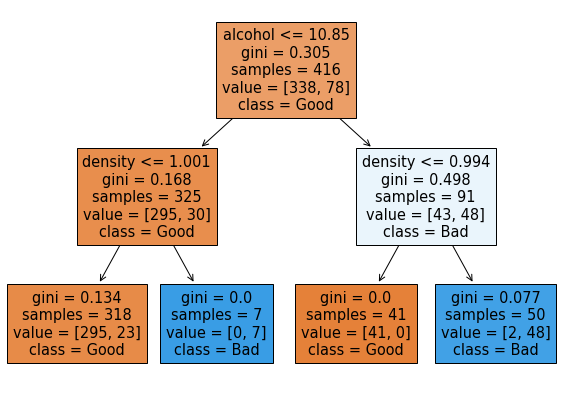

In [50]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X), class_names=['Good','Bad'],filled = True)
plt.show()

# <center> Scaling

In [34]:
tree.fit(X_train_scaled,y_train)
y_predict = tree.predict(X_test_scaled)
accuracy_score(y_test,y_predict)

0.9519230769230769

Pada decision tree scaling tidak terlalu berpangaruh

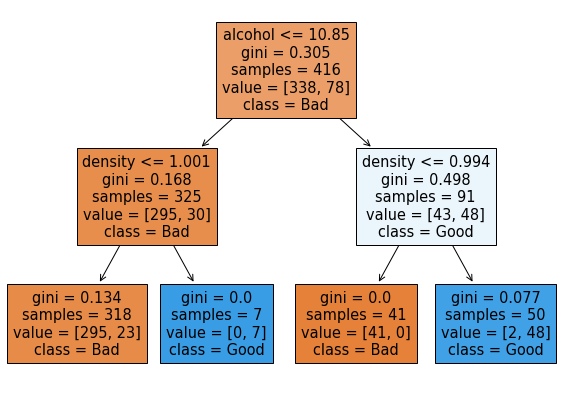

In [53]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X), class_names=['Bad','Good'],filled = True)
plt.show()

angka berubah karena scaling, dan lebih susah melakukan analisa karena angka dirubah dengan min max scaler